## Imports

In [6]:
import librosa

import os
import torch
import torch.nn.functional as Func
import torch.nn as nn
import numpy as np
from torch.autograd import Variable
import torch.optim as optim
import torch.utils.data as data
from torch.nn.utils.rnn import pack_padded_sequence
from torch.nn.utils.rnn import pad_packed_sequence
import copy
import math
import matplotlib.pyplot as plt
import numpy as np

## Paths

In [4]:
#Data Path for training data
#Noisy Speech
trainPath = './GeneratedData/Training/Dirty/'
trainMixedList = os.listdir(trainPath)
trainLength = len(trainMixedList)

#Clean Speech
cleanPath = './GeneratedData/Training/Clean/'
cleanSpeechList = os.listdir(cleanPath)
cleanSpeechLength = len(cleanSpeechList)

#.npy output folder
trainPyPath = './GeneratedData/npy/train/dirty_stft/'
cleanPyPath = './GeneratedData/npy/train/clean_stft/'
normPyPath = './GeneratedData/npy/train/norm_stft/'
stdPyPath = './GeneratedData/npy/train/std_stft/'

## Calculation of Mean, Standard Deviation, Maximum and Minimum of Training Set

In [5]:
c = 0
ex = 0
ex2 = 0
max_train = np.array([-math.inf]*257).reshape(257,1)
min_train = np.array([math.inf]*257).reshape(257,1)

for index in range(0, trainLength):
    xFile = trainMixedList[index]
        
    sx, sr = librosa.load(trainPath + xFile, sr=None)
    X = librosa.stft(sx,  n_fft = 512, hop_length = 160, win_length = 320)
    
    X = 10*np.log10(np.abs(X))
    
    ex +=  np.sum(X, axis = 1)
    ex2 += np.sum(X**2, axis = 1)
    X_max = np.concatenate([X, max_train], axis = 1)
    X_min = np.concatenate([X, min_train], axis = 1)
    max_train = np.max(X_max, axis = 1, keepdims = True)
    min_train = np.min(X_min, axis = 1, keepdims = True)
    
    c+=X.shape[1]
    if index % 500 == 0:
        print(index)
    
mean_train = ex/c
std_train = np.sqrt(ex2/c - mean_train**2)

# print(mean, std)   

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500


In [5]:
mean_train.shape

(257,)

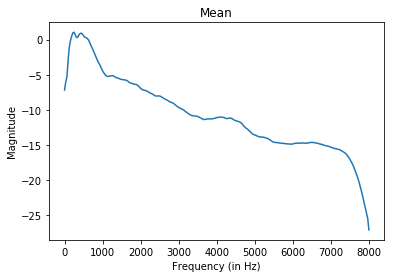

In [9]:
x_axis = np.linspace(0, 8000, 257)
plt.plot(x_axis, mean_train)
plt.xlabel('Frequency (in Hz)')
plt.ylabel('Magnitude')
plt.title('Mean')
plt.show()

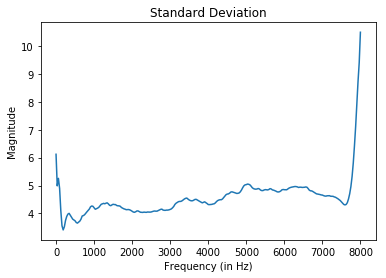

In [10]:
plt.plot(x_axis, std_train)
plt.xlabel('Frequency (in Hz)')
plt.ylabel('Magnitude')
plt.title('Standard Deviation')
plt.show()

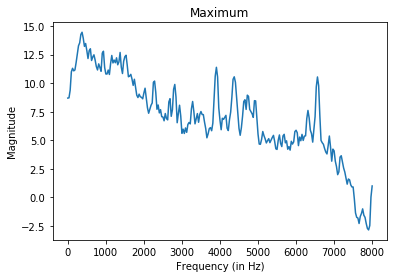

In [11]:
plt.plot(x_axis, max_train)
plt.xlabel('Frequency (in Hz)')
plt.ylabel('Magnitude')
plt.title('Maximum')
plt.show()

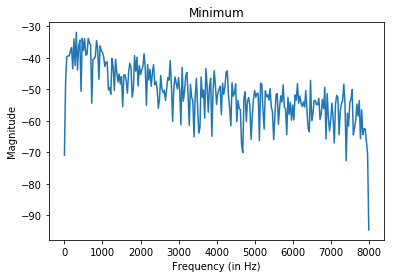

In [13]:
plt.plot(x_axis, min_train)
plt.xlabel('Frequency (in Hz)')
plt.ylabel('Magnitude')
plt.title('Minimum')
plt.show()

## Calculation of Mean and Standard Deviation of Standardized Training Data 
## And Calculation of Maximum and Minimum of Normalized Training Data

In [15]:
c = 0

ex = 0
ex2 = 0
max_train_2 = np.array([-math.inf]*257).reshape(257,1)
min_train_2 = np.array([math.inf]*257).reshape(257,1)
denominator = max_train - min_train
std_train = std_train.reshape(257, 1)
mean_train = mean_train.reshape(257, 1)

for index in range(0, trainLength):
    xFile = trainMixedList[index]
    yFile = cleanSpeechList[index]
    
    sx, sr = librosa.load(trainPath + xFile, sr=None)
    X = librosa.stft(sx,  n_fft = 512, hop_length = 160, win_length = 320)
    X = np.abs(X)
#     Xfile = trainPyPath + 'dirty' + str(index+1) + '.npy'
#     np.save(Xfile, X)
    
#     ss,sr = librosa.load(cleanPath + yFile, sr=None)
#     S = librosa.stft(ss, n_fft = 512, hop_length = 160, win_length = 320)
#     S = np.abs(S)
#     Sfile = cleanPyPath + 'clean' + str(index+1) + '.npy' 
#     np.save(Sfile, S)
    
    X = 10*np.log10(X)
    X_norm = (X - min_train)/denominator
    X_std = (X-mean_train)/std_train
    
#     normfile = normPyPath + 'norm' + str(index+1) + '.npy' 
#     np.save(normfile, X_norm)
    
#     Stdfile = stdPyPath + 'std' + str(index+1) + '.npy' 
#     np.save(Stdfile, X_std)
    
    if X.shape != S.shape:
        print("S")
        print(index+1)
        break
    
    if X.shape != X_norm.shape:
        print("norm")
        print(index+1)
        break
    
    if X.shape != X_std.shape:
        print("std")
        print(index+1)
        break

    ex +=  np.sum(X_std, axis = 1)
    ex2 += np.sum(X_std**2, axis = 1)
    X_max = np.concatenate([X_norm, max_train_2], axis = 1)
    X_min = np.concatenate([X_norm, min_train_2], axis = 1)
    max_train_2 = np.max(X_max, axis = 1, keepdims = True)
    min_train_2 = np.min(X_min, axis = 1, keepdims = True)
    
    c+=X.shape[1]
    if index % 500 == 0:
        print(index)
    
mean_train_2 = ex/c
std_train_2 = np.sqrt(ex2/c - mean_train_2**2)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500


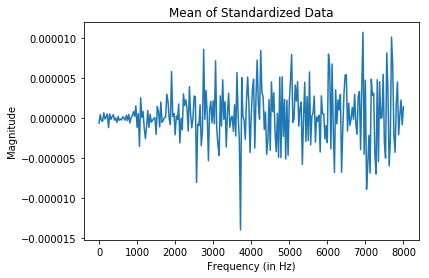

In [16]:
x_axis = np.linspace(0, 8000, 257)
plt.plot(x_axis, mean_train_2)
plt.xlabel('Frequency (in Hz)')
plt.ylabel('Magnitude')
plt.title('Mean of Standardized Data')
plt.show()

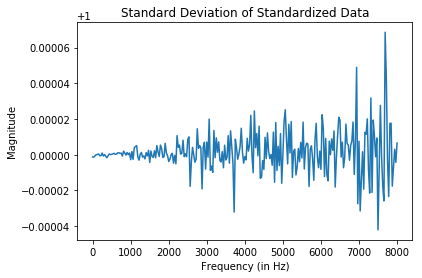

In [18]:
plt.plot(x_axis, std_train_2)
plt.xlabel('Frequency (in Hz)')
plt.ylabel('Magnitude')
plt.title('Standard Deviation of Standardized Data')
plt.show()

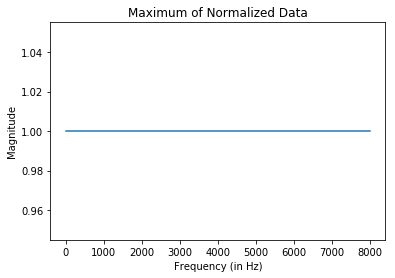

In [19]:
plt.plot(x_axis, max_train_2)
plt.xlabel('Frequency (in Hz)')
plt.ylabel('Magnitude')
plt.title('Maximum of Normalized Data')
plt.show()

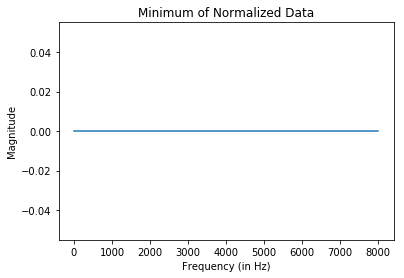

In [34]:
plt.plot(x_axis, min_train_2)
plt.xlabel('Frequency (in Hz)')
plt.ylabel('Magnitude')
plt.title('Minimum of Normalized Data')
plt.show()

## Paths for Dev Set

In [21]:
validPath = './GeneratedData/Dev/Dirty/'
validMixedList = os.listdir(validPath)
validLength = len(validMixedList)

cleanPath = './GeneratedData/Dev/Clean/'
cleanSpeechList = os.listdir(cleanPath)
cleanSpeechLength = len(cleanSpeechList)

dirtyPyPath = './GeneratedData/npy/dev/dirty_stft/'
cleanPyPath = './GeneratedData/npy/dev/clean_stft/'
normPyPath = './GeneratedData/npy/dev/norm_stft/'
stdPyPath = './GeneratedData/npy/dev/std_stft/'

## Calculation of Mean, Standard Deviation, Maximum and Minimum

In [22]:
c = 0
ex = 0
ex2 = 0
max_dev = np.array([-math.inf]*257).reshape(257,1)
min_dev = np.array([math.inf]*257).reshape(257,1)

for index in range (0,validLength):
    xFile = validMixedList[index]
    
    sx,sr = librosa.load(validPath + xFile,sr=None)
    X = librosa.stft(sx,n_fft=512,hop_length=160,win_length=320)
    X = 10*np.log10(np.abs(X))
    
    ex +=  np.sum(X, axis = 1)
    ex2 += np.sum(X**2, axis = 1)
    X_max = np.concatenate([X, max_dev], axis = 1)
    X_min = np.concatenate([X, min_dev], axis = 1)
    max_dev = np.max(X_max, axis = 1, keepdims = True)
    min_dev = np.min(X_min, axis = 1, keepdims = True)
    
    c+=X.shape[1]
    
    
mean_dev = ex/c
std_dev = np.sqrt(ex2/c - mean_dev**2) 

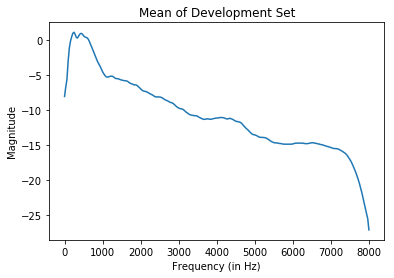

In [24]:
plt.plot(x_axis, mean_dev)
plt.xlabel('Frequency (in Hz)')
plt.ylabel('Magnitude')
plt.title('Mean of Development Set')
plt.show()

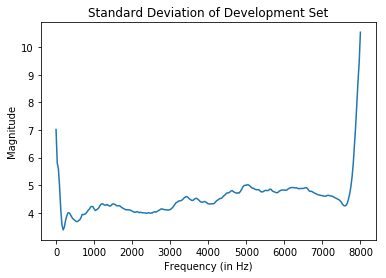

In [26]:
plt.plot(x_axis, std_dev)
plt.xlabel('Frequency (in Hz)')
plt.ylabel('Magnitude')
plt.title('Standard Deviation of Development Set')
plt.show()

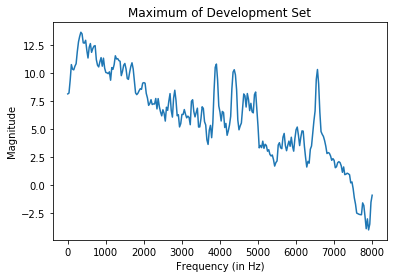

In [30]:
plt.plot(x_axis, max_dev)
plt.xlabel('Frequency (in Hz)')
plt.ylabel('Magnitude')
plt.title('Maximum of Development Set')
plt.show()

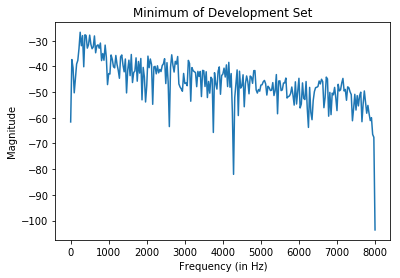

In [31]:
plt.plot(x_axis, min_dev)
plt.xlabel('Frequency (in Hz)')
plt.ylabel('Magnitude')
plt.title('Minimum of Development Set')
plt.show()

## Calculation of Mean and Standard Deviation of Standardized Development Set 
## And Calculation of Maximum and Minimum of Normalized Development Set

In [32]:
c = 0

ex = 0
ex2 = 0
max_dev_2 = np.array([-math.inf]*257).reshape(257,1)
min_dev_2 = np.array([math.inf]*257).reshape(257,1)
denominator2 = max_dev - min_dev
std_dev = std_dev.reshape(257, 1)
mean_dev = mean_dev.reshape(257, 1)

for index in range (0,validLength):
    xFile = validMixedList[index]
    yFile = cleanSpeechList[index]

    ss,sr = librosa.load(cleanPath + yFile, sr=None)
    S = librosa.stft(ss, n_fft = 512, hop_length = 160, win_length = 320)
    S = np.abs(S)
#     Sfile = cleanPyPath + 'clean' + str(index+1) + '.npy' 
#     np.save(Sfile, S)
    
    sx,sr = librosa.load(validPath + xFile,sr=None)
    X = librosa.stft(sx,n_fft=512,hop_length=160,win_length=320)
    X = np.abs(X)
#     Xfile = dirtyPyPath + 'dirty' + str(index+1) + '.npy'
#     np.save(Xfile, X)
    
    X = 10*np.log10(X)
    X_norm = (X - min_dev)/denominator2
    X_std = (X-mean_dev)/std_dev
    
#     normfile = normPyPath + 'norm' + str(index+1) + '.npy' 
#     np.save(normfile, X_norm)
    
#     stdfile = stdPyPath + 'std' + str(index+1) + '.npy' 
#     np.save(stdfile, X_std)
    
    if X.shape != S.shape:
        print("S")
        print(index+1)
        break
    
    if X.shape != X_norm.shape:
        print("norm")
        print(index+1)
        break
    
    if X.shape != X_std.shape:
        print("std")
        print(index+1)
        break
    
    ex +=  np.sum(X_std, axis = 1)
    ex2 += np.sum(X_std**2, axis = 1)
    X_max = np.concatenate([X_norm, max_dev_2], axis = 1)
    X_min = np.concatenate([X_norm, min_dev_2], axis = 1)
    max_dev_2 = np.max(X_max, axis = 1, keepdims = True)
    min_dev_2 = np.min(X_min, axis = 1, keepdims = True)
    
    c+=X.shape[1]
    
    
mean_dev_2 = ex/c
std_dev_2 = np.sqrt(ex2/c - mean_dev_2**2)

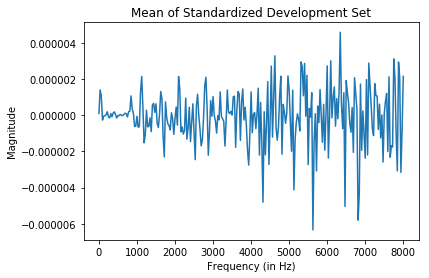

In [35]:
plt.plot(x_axis, mean_dev_2)
plt.xlabel('Frequency (in Hz)')
plt.ylabel('Magnitude')
plt.title('Mean of Standardized Development Set')
plt.show()

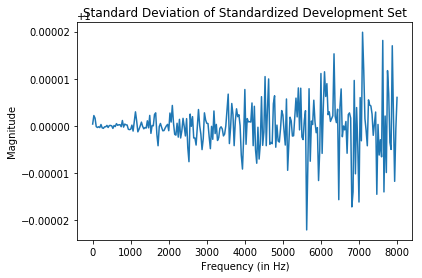

In [36]:
plt.plot(x_axis, std_dev_2)
plt.xlabel('Frequency (in Hz)')
plt.ylabel('Magnitude')
plt.title('Standard Deviation of Standardized Development Set')
plt.show()

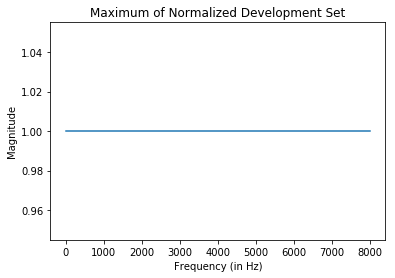

In [37]:
plt.plot(x_axis, max_dev_2)
plt.xlabel('Frequency (in Hz)')
plt.ylabel('Magnitude')
plt.title('Maximum of Normalized Development Set')
plt.show()

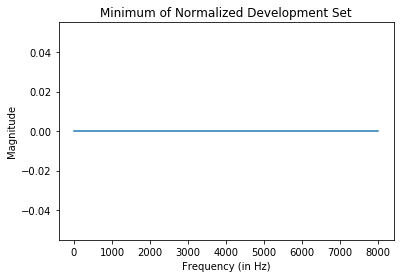

In [38]:
plt.plot(x_axis, min_dev_2)
plt.xlabel('Frequency (in Hz)')
plt.ylabel('Magnitude')
plt.title('Minimum of Normalized Development Set')
plt.show()

## Test Paths

In [26]:
testPath = './GeneratedData/Test/Dirty/'
testMixedList = os.listdir(testPath)
testLength = len(testMixedList)

cleanPath = './GeneratedData/Test/Clean/'
cleanSpeechList = os.listdir(cleanPath)
cleanSpeechLength = len(cleanSpeechList)

# testPyPath ='./GeneratedData/npy/Test/'
dirtyPyPath = './GeneratedData/npy/test/dirty_stft/'
cleanPyPath = './GeneratedData/npy/test/clean_stft/'
# normPyPath = './GeneratedData/npy/test/norm_stft/'
# stdPyPath = './GeneratedData/npy/test/std_stft/'

# teList = os.listdir(testPyPath)

## Save Test Files

In [27]:
for index in range(0, testLength):
    xFile = testMixedList[index]
    yFile = cleanSpeechList[index]
    
    ss,sr = librosa.load(cleanPath + yFile, sr=None)
    S = librosa.stft(ss, n_fft = 512, hop_length = 160, win_length = 320)
    S = np.abs(S)
    Sfile = cleanPyPath + 'clean' + str(index+1) + '.npy' 
    np.save(Sfile, S)
    
    sx, sr = librosa.load(testPath + xFile, sr=None)
    X = librosa.stft(sx,n_fft=512,hop_length=160,win_length=320)
    X = np.abs(X)
    Xfile = dirtyPyPath + 'dirty' + str(index+1) + '.npy'
    np.save(Xfile, X)
    
    if X.shape != S.shape:
        print("S")
        print(index+1)
        break

### Save Mean, Standard Deviation, Maximum and Minimum of Training and Dev Sets

In [28]:
meantrainFile = './GeneratedData/npy/meantrain.npy'
np.save(meantrainFile, mean_train)

In [29]:
stdtrainFile = './GeneratedData/npy/stdtrain.npy'
np.save(stdtrainFile, std_train)

In [30]:
mintrainFile = './GeneratedData/npy/mintrain.npy'
np.save(mintrainFile, min_train)

In [31]:
maxtrainFile = './GeneratedData/npy/maxtrain.npy'
np.save(maxtrainFile, max_train)

In [32]:
meandevFile = './GeneratedData/npy/meandev.npy'
np.save(meandevFile, mean_dev)

In [33]:
stddevFile = './GeneratedData/npy/stddev.npy'
np.save(stddevFile, std_dev)

In [34]:
mindevFile = './GeneratedData/npy/mindev.npy'
np.save(mindevFile, min_dev)

In [35]:
maxdevFile = './GeneratedData/npy/maxdev.npy'
np.save(maxdevFile, max_dev)